This tutorial explains simple linear regression using gradient descent. While it was originally done without a code implementation (as shown in the link below), we will implement it using the NumPy and matplotlib libraries.
https://machinelearningmastery.com/linear-regression-tutorial-using-gradient-descent-for-machine-learning/

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Tutorial Dataset

In [2]:
x = np.array([1, 2, 4, 3, 5])
y = np.array([1, 3, 3, 2, 5])

# Simple linear Regression

**Model Assumption:**

We assume the relationship between the input 𝑥 and output 𝑦 is linear:
$p(i) = \beta_0 + \beta_1×x(i)$
Where:

$p(i)$ is the predicted value for the $i$-th data point.

$\beta_0$ is the intercept (also called the bias term).

$\beta_0$ is the slope (the weight or coefficient for 𝑥).

**Error Calculation:**

For each data point, we compute the error between the predicted value $p(i)$ and the actual target value $y(i)$:

$error=p(i)−y(i)$

This measures how far off the prediction is from the actual value.

**Gradient Descent Update Rule:**

The goal is to minimize the error by adjusting the values of $\beta_0$ and $\beta_1$. This is done using gradient descent, an optimization algorithm that updates the coefficients (weights) based on the direction of the steepest descent (the gradient of the error function). The update rules for $\beta_0$ and $\beta_1$ are as follows:

$\beta_0 = \beta_0-\alpha×error$

$\beta_1=\beta_1-\alpha×error×x(i)$

Where:
α is the learning rate, which controls how large the updates are at each step. A small $\alpha$ ensures gradual changes, while a large $\alpha$ can lead to larger, more abrupt updates.

$error×x(i)$ represents the contribution of the $i$-th data point to the change in $\beta_1$.

**Detailed Breakdown of the Process:**

In [18]:
# Given data
x = np.array([1, 2, 4, 3, 5])
y = np.array([1, 3, 3, 2, 5])

# Parameters
alpha = 0.01  # Learning rate
B0 = 0.0  # Initial value for B0
B1 = 0.0  # Initial value for B1
n = len(x)  # Number of data points
epochs = 4  # Number of epochs
updates = 0
errors = []

# Gradient Descent function
for epoch in range(epochs):
    for i in range(n):
        # Predicted value
        p = B0 + B1 * x[i]

        # Error calculation
        error = p - y[i]

        # Update coefficients B0 and B1
        B0 = B0 - alpha * error
        B1 = B1 - alpha * error * x[i]
        updates += 1
        errors.append(error)
        print(f" {updates}: B0 = {B0}, B1 = {B1}, error = {error}")

 1: B0 = 0.01, B1 = 0.01, error = -1.0
 2: B0 = 0.039700000000000006, B1 = 0.0694, error = -2.97
 3: B0 = 0.066527, B1 = 0.176708, error = -2.6827
 4: B0 = 0.08056049, B1 = 0.21880847, error = -1.403349
 5: B0 = 0.1188144616, B1 = 0.410078328, error = -3.8253971599999996
 6: B0 = 0.123525533704, B1 = 0.414789400104, error = -0.47110721040000003
 7: B0 = 0.14399449036488, B1 = 0.45572731342576, error = -2.046895666088
 8: B0 = 0.1543254529242008, B1 = 0.4970511636630432, error = -1.03309625593208
 9: B0 = 0.1578706634850675, B1 = 0.5076867953456433, error = -0.3545210560866696
 10: B0 = 0.18090761708293468, B1 = 0.6228715633349792, error = -2.3036953597867162
 11: B0 = 0.18286982527875553, B1 = 0.6248337715308, error = -0.19622081958208615
 12: B0 = 0.19854445159535197, B1 = 0.6561830241639929, error = -1.5674626316596445
 13: B0 = 0.20031168611283873, B1 = 0.6632519622339399, error = -0.17672345174867665
 14: B0 = 0.19841101038469214, B1 = 0.6575499350495001, error = 0.1900675728146583

**Error:**

While more iterations could be done, 20 iterations (4 epochs) is considered a reasonable point to stop. Small differences in coefficient values might arise due to variations in precision across different tools. By plugging the coefficients into the linear regression equation, predictions and errors can be calculated for each instance. The plot of error over time shows that the error decreased with each iteration but began fluctuating towards the end. This graph is useful in monitoring the learning process.

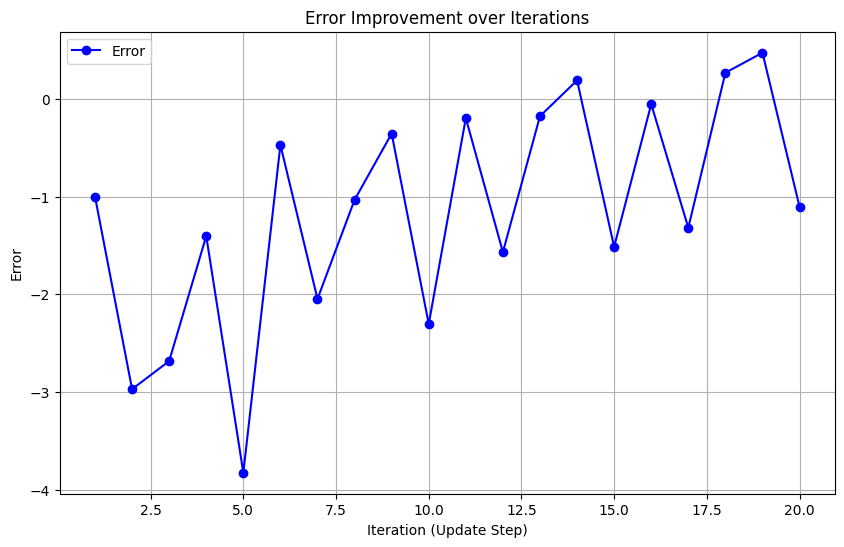

In [10]:
# Plotting the error improvement
plt.figure(figsize=(10,6))
plt.plot(range(1, 21), errors, marker='o', linestyle='-', color='b', label="Error")
plt.title("Error Improvement over Iterations")
plt.xlabel("Iteration (Update Step)")
plt.ylabel("Error")
plt.grid(True)
plt.legend()
plt.show()

**Making predictions:**

In [20]:
# Prediction using the equation y = B0 + B1 * x
y_pred = B0 + B1 * x
print(y_pred)

[1.0213361  1.81177471 3.39265193 2.60221332 4.18309054]


In [16]:
x_line = np.linspace(np.min(x), np.max(x), 5)
y_line = B0 + B1 * x

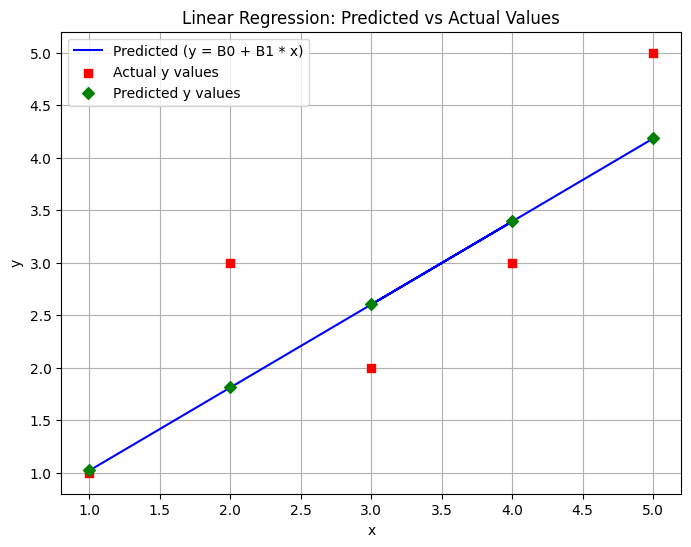

In [24]:
# Plotting the graph
plt.figure(figsize=(8, 6))

# Plot the line for y = B0 + B1 * x (predictions)
plt.plot(x, y_pred, label="Predicted (y = B0 + B1 * x)", color="blue", linestyle="-")

# Plot the actual y values
plt.scatter(x, y, color="red", label="Actual y values",marker='s', zorder=5)

# Plot the predicted points
plt.scatter(x, y_pred, color="green", label="Predicted y values",marker='D', zorder=5)

# Add labels and title
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression: Predicted vs Actual Values")

# Add legend
plt.legend()

# Display the graph
plt.grid(True)
plt.show()

**Estimating Error**

We can calculate an error score for our predictions called the Root Mean Squared Error or
RMSE:

$RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$

In [26]:
rmse = np.sqrt(np.mean((y - y_pred)**2))
print(rmse)

0.7206264014789554
